# 🏨 Dynamic Hotel Pricing Optimization
## 📊 01_EDA - Exploratory Data Analysis

**Goal:** Explore the dataset, understand key patterns and prepare features for modeling.


In [1]:
# 1️⃣ Load Data
import pandas as pd

df = pd.read_csv('../data/raw/hotel_bookings.csv')

df.shape
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
# 2️⃣ Data Summary
df.info()

df.isnull().sum()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [3]:
# 3️⃣ Feature Engineering
df['stay_length'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['booking_month'] = pd.to_datetime(df['reservation_status_date']).dt.month
df['weekday'] = pd.to_datetime(df['reservation_status_date']).dt.weekday

df[['stay_length', 'lead_time', 'booking_month', 'weekday']].head()


,stay_length,lead_time,booking_month,weekday
0,0,342,7,2
1,0,737,7,2
2,1,7,7,3
3,1,13,7,3
4,2,14,7,4


Cancellation Rate: 37.04%


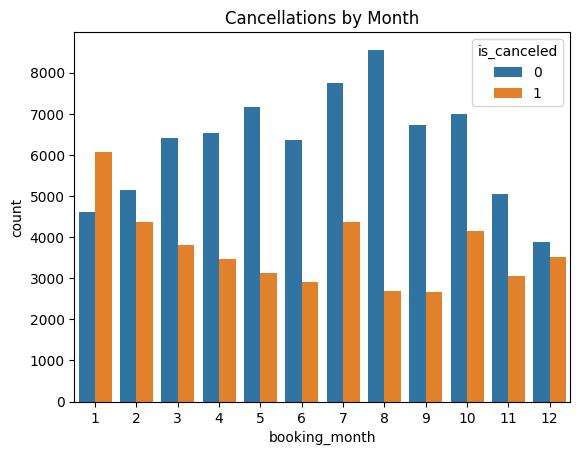

In [4]:
# 4️⃣ Target Exploration - Cancellations
import seaborn as sns
import matplotlib.pyplot as plt

cancel_rate = df['is_canceled'].mean()
print(f"Cancellation Rate: {cancel_rate:.2%}")

sns.countplot(data=df, x='booking_month', hue='is_canceled')
plt.title('Cancellations by Month')
plt.show()


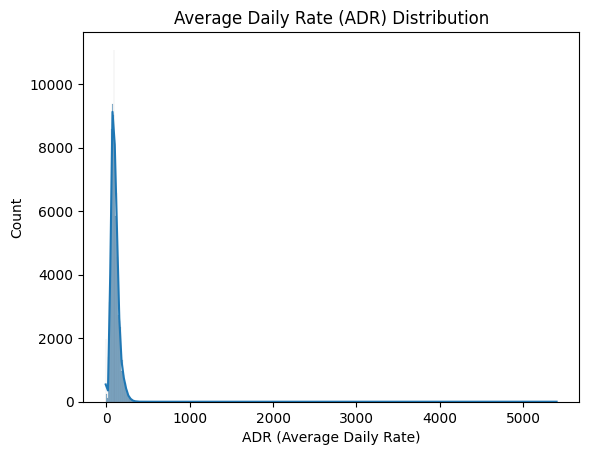

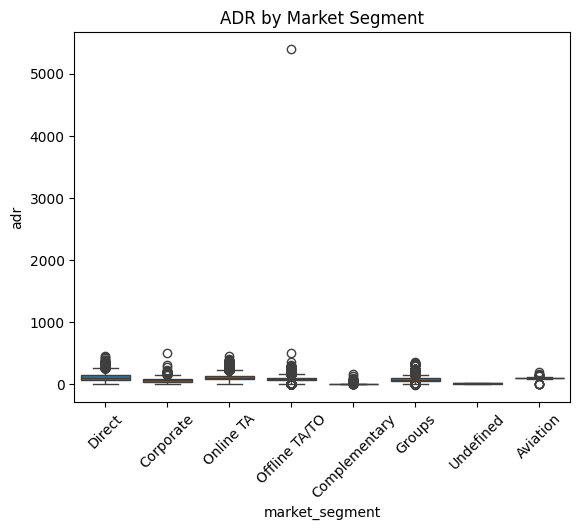

In [5]:
# 5️⃣ Price Analysis
sns.histplot(df['adr'], kde=True)
plt.title('Average Daily Rate (ADR) Distribution')
plt.xlabel('ADR (Average Daily Rate)')
plt.show()

sns.boxplot(data=df, x='market_segment', y='adr')
plt.xticks(rotation=45)
plt.title('ADR by Market Segment')
plt.show()


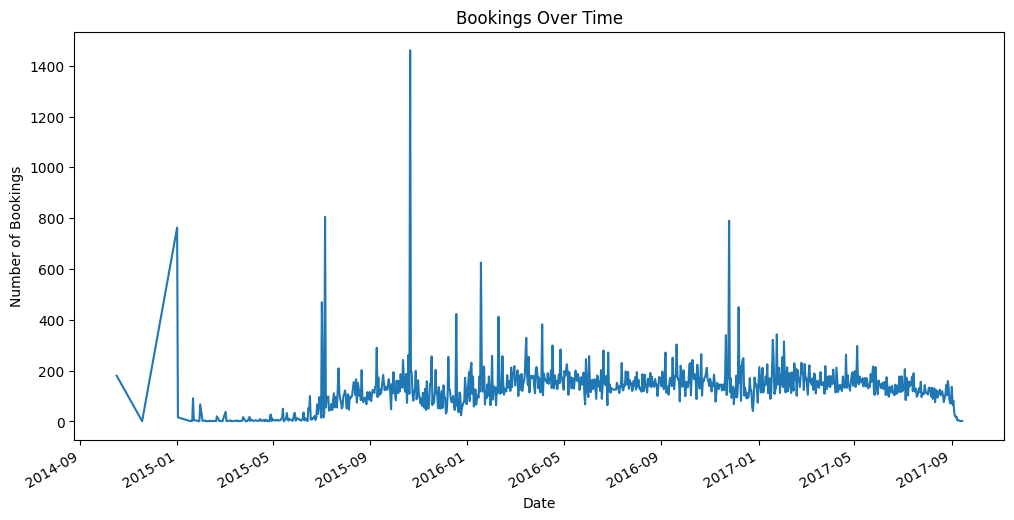

In [6]:
# 6️⃣ Booking Patterns
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
bookings_by_date = df.groupby('reservation_status_date').size()

bookings_by_date.plot(figsize=(12,6))
plt.title('Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()
